<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A4-Neural-Network-Classifier,-or-Fun-With-Handwritten-Digits!" data-toc-modified-id="A4-Neural-Network-Classifier,-or-Fun-With-Handwritten-Digits!-1">A4 Neural Network Classifier, or <em>Fun With Handwritten Digits</em>!</a></span><ul class="toc-item"><li><span><a href="#Requirement-1" data-toc-modified-id="Requirement-1-1.1">Requirement 1</a></span></li></ul></li><li><span><a href="#Apply-NeuralNetworkClassifier-to-Handwritten-Digits" data-toc-modified-id="Apply-NeuralNetworkClassifier-to-Handwritten-Digits-2">Apply <code>NeuralNetworkClassifier</code> to Handwritten Digits</a></span><ul class="toc-item"><li><span><a href="#Requirement-2" data-toc-modified-id="Requirement-2-2.1">Requirement 2</a></span></li></ul></li><li><span><a href="#Requirement-3" data-toc-modified-id="Requirement-3-3">Requirement 3</a></span></li><li><span><a href="#Requirement-4" data-toc-modified-id="Requirement-4-4">Requirement 4</a></span></li><li><span><a href="#Requirement-5" data-toc-modified-id="Requirement-5-5">Requirement 5</a></span><ul class="toc-item"><li><span><a href="#Check-In" data-toc-modified-id="Check-In-5.1">Check-In</a></span></li></ul></li><li><span><a href="#Grading" data-toc-modified-id="Grading-6">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-7">Extra Credit</a></span></li></ul></div>

# A4 Neural Network Classifier, or *Fun With Handwritten Digits*!

## Requirement 1

For this assignment, you will be adding code to the python script file `neuralnetworksA4.py` that you will [download from here](https://www.cs.colostate.edu/~anderson/cs545/notebooks/neuralnetworksA4.tar). The file `neuralnetworksA4.py` currently contains the implementation of the `NeuralNetwork` class that is a solution to A3. It also contains an incomplete implementation of the subclass `NeuralNetworkClassifier` that extends `NeuralNetwork` as discussed in class.  You must complete this implementation. Your `NeuralNetworkClassifier` implementation should rely on inheriting functions from `NeuralNetwork` as much as possible. Your `neuralnetworksA4.py` file (notice it is plural) will now contain two classes, `NeuralNetwork` and `NeuralNetworkClassifier`.  The tar file `neuralnetworksA4.tar` also contains `optimizers3.py`, another version of our optimizer code that you must use in this assignment.

In `NeuralNetworkClassifier` you will replace the `_error_f` function with one called `_neg_log_likelihood_f`. You will also have to define a new version of the `_gradient_f` function for `NeuralNetworkClassifier`.

Here are some example tests.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import neuralnetworksA4 as nn

In [34]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([[0], [1], [1], [0]])
X, T

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [35]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [36]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2) has not been trained.


In [37]:
nnet.Ws

[array([[ 0.12952296, -0.38212533, -0.07383268,  0.31091752, -0.23633798,
         -0.40511172, -0.55139454, -0.09211682, -0.30174387, -0.18745848],
        [ 0.56662595, -0.3028474 , -0.48359706,  0.19583749,  0.13999926,
         -0.26066957, -0.03900416, -0.44067096, -0.49195143,  0.46277416],
        [ 0.33943873,  0.39325596,  0.36397022,  0.56690583,  0.08922813,
          0.36230683, -0.09085429, -0.5456561 , -0.05295844, -0.45573018]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])]

The `_error_f` function is replaced with `_neg_log_likelihood`.  If you add some print statements in `_neg_log_likelihood` functions, you can compare your output to the following results.

In [38]:
nnet.set_debug(True)

Debugging information will now be printed.


In [39]:
nnet.train(X, T, X, T, n_epochs=1, method='sgd', learning_rate=0.01)

In _neg_log_likelihood_f: arguments are
 X (standardized):
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]] 
 T (indicator variables):
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Result of call to self._forward is:
[array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]]), array([[-0.65071726, -0.44024437,  0.04576217, -0.42339865, -0.43460927,
        -0.46740829, -0.39822372,  0.71346703,  0.23848393, -0.19208626],
       [ 0.34231299, -0.79254131, -0.72655903, -0.06007838, -0.18346578,
        -0.77314041, -0.46175878,  0.0128676 , -0.62959015,  0.62370478],
       [-0.09735492,  0.30405172,  0.64909581,  0.5928089 , -0.27947188,
         0.2144819 , -0.53935438, -0.19458859,  0.13639376, -0.80263068],
       [ 0.77613968, -0.28371417, -0.19108161,  0.79083647, -0.00711046,
        -0.294489  , -0.59233336, -0.79262132, -0.68931726, -0.1784822 ]]), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])]
Result of _softmax is:
[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 

NeuralNetworkClassifier(2, [10], 2)

In [40]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2) trained for 1 epochs
  with final errors of 0.7071 train 0.7071 validation
  using best weights from epoch 1.


Now if you turn off debugging, most print statements will be suppressed so you can run for more epochs without tons of output.

In [41]:
nnet.set_debug(False)

No debugging information will be printed.


In [42]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [43]:
nnet.train(X, T, X, T, 100, method='adam')

Adam: Epoch 10 Likelihood= Train 0.96044 Validate 0.96044
Adam: Epoch 20 Likelihood= Train 0.99936 Validate 0.99936
Adam: Epoch 30 Likelihood= Train 0.99989 Validate 0.99989
Adam: Epoch 40 Likelihood= Train 0.99995 Validate 0.99995
Adam: Epoch 50 Likelihood= Train 0.99996 Validate 0.99996
Adam: Epoch 60 Likelihood= Train 0.99997 Validate 0.99997
Adam: Epoch 70 Likelihood= Train 0.99997 Validate 0.99997
Adam: Epoch 80 Likelihood= Train 0.99997 Validate 0.99997
Adam: Epoch 90 Likelihood= Train 0.99997 Validate 0.99997
Adam: Epoch 100 Likelihood= Train 0.99997 Validate 0.99997


NeuralNetworkClassifier(2, [10], 2)

In [44]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2) trained for 100 epochs
  with final errors of 1.0000 train 1.0000 validation
  using best weights from epoch 100.


The `use()` function returns two `numpy` arrays. The first one are the class predictions for eachs sample, containing values from the set of unique values in `T` passed into the `train()` function.

The second value are the probabilities of each class for each sample. This should a column for each unique value in `T`.

In [45]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]], dtype=int64),
 array([[9.99996160e-01, 3.84039514e-06],
        [9.23756482e-05, 9.99907624e-01],
        [4.77851177e-06, 9.99995221e-01],
        [9.99875174e-01, 1.24826083e-04]]))

In [109]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

In [47]:
percent_correct(nnet.use(X)[0], T)

100.0

Works!  The XOR problem was used early in the history of neural networks as a problem that cannot be solved with a linear model.  Let's try it.  

In [48]:
nnet = nn.NeuralNetworkClassifier(2, [], 2)  # [], so no hidden layers, just a linear model
nnet.train(X, T, X, T, 100, method='sgd', learning_rate=0.1, momentum=0.9)

SGD: Epoch 10 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 20 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 30 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 40 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 50 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 60 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 70 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 80 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 90 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 100 Likelihood= Train 0.70711 Validate 0.70711


NeuralNetworkClassifier(2, [], 2)

In [49]:
print(nnet)

NeuralNetworkClassifier(2, [], 2) trained for 100 epochs
  with final errors of 0.7071 train 0.7071 validation
  using best weights from epoch 1.


In [50]:
nnet.use(X)

(array([[0],
        [0],
        [0],
        [0]], dtype=int64),
 array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [51]:
percent_correct(nnet.use(X)[0], T)

50.0

Now try with hidden layers.

In [52]:
nnet = nn.NeuralNetworkClassifier(2, [1], 2)  
nnet.train(X, T, X, T, 100, method='scg')

SCG: Epoch 10 Likelihood= Train 0.78148 Validate 0.78148
SCG: Epoch 20 Likelihood= Train 0.78756 Validate 0.78756
SCG: Epoch 30 Likelihood= Train 0.78765 Validate 0.78765
SCG: Epoch 40 Likelihood= Train 0.78766 Validate 0.78766
SCG: Epoch 50 Likelihood= Train 0.78766 Validate 0.78766


NeuralNetworkClassifier(2, [1], 2)

In [53]:
nnet = nn.NeuralNetworkClassifier(2, [5], 2)  
nnet.train(X, T, X, T, 400, method='sgd', learning_rate=0.1, momentum=0.9)

SGD: Epoch 40 Likelihood= Train 0.79771 Validate 0.79771
SGD: Epoch 80 Likelihood= Train 0.98391 Validate 0.98391
SGD: Epoch 120 Likelihood= Train 0.99338 Validate 0.99338
SGD: Epoch 160 Likelihood= Train 0.99558 Validate 0.99558
SGD: Epoch 200 Likelihood= Train 0.99667 Validate 0.99667
SGD: Epoch 240 Likelihood= Train 0.99732 Validate 0.99732
SGD: Epoch 280 Likelihood= Train 0.99777 Validate 0.99777
SGD: Epoch 320 Likelihood= Train 0.99808 Validate 0.99808
SGD: Epoch 360 Likelihood= Train 0.99832 Validate 0.99832
SGD: Epoch 400 Likelihood= Train 0.99850 Validate 0.99850


NeuralNetworkClassifier(2, [5], 2)

In [54]:
print(nnet)

NeuralNetworkClassifier(2, [5], 2) trained for 400 epochs
  with final errors of 0.9985 train 0.9985 validation
  using best weights from epoch 400.


A second way to evaluate a classifier is to calculate a confusion matrix. This shows the percent accuracy for each class, and also shows which classes are predicted in error.

Here is a function you can use to show a confusion matrix.

In [29]:
import pandas

def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

C:\Users\diloc\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [56]:
nnet.best_epoch

400

In [57]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]], dtype=int64),
 array([[0.99714056, 0.00285944],
        [0.00329779, 0.99670221],
        [0.00257252, 0.99742748],
        [0.99681034, 0.00318966]]))

In [160]:
confusion_matrix(nnet.use(X)[0], T)

Percent Correct


,10,20
10,100.0,0.0
20,0.0,100.0


In [59]:
for method in ('sgd', 'adam', 'scg'):
    nnet = nn.NeuralNetworkClassifier(2, [20, 20], 2)  
    nnet.train(X, T, X, T, 400, method=method, learning_rate=0.1, momentum=0.9, verbose=False)
    pc = percent_correct(nnet.use(X)[0], T)
    print(f'{method} % Correct: {pc:.0f}')
    

sgd % Correct: 100
adam % Correct: 100
scg % Correct: 100


# Apply `NeuralNetworkClassifier` to Handwritten Digits

Apply your `NeuralNetworkClassifier` to the [MNIST digits dataset](https://figshare.com/articles/dataset/mnist_pkl_gz/13303457/1).

First, make sure your solution works on the following examples. Then complete `make_mnist_classifier` and use it as instructed below.

In [127]:
import pickle
import gzip

In [128]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [62]:
28*28

784

In [65]:
def draw_digit(image, label, predicted_label=None):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    title = str(label)
    color = 'black'
    if predicted_label is not None:
        title += ' as {}'.format(predicted_label)
        if predicted_label != label:
            color = 'red'
    plt.title(title, color=color)

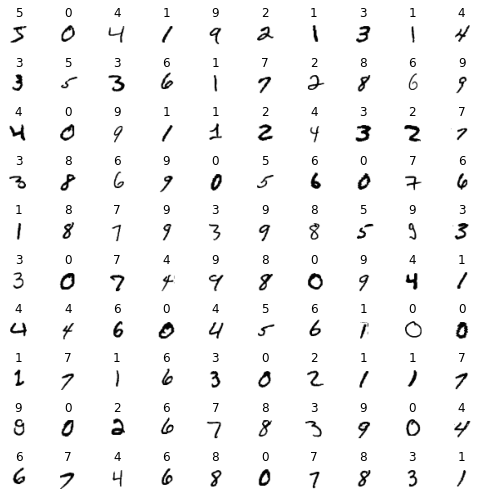

In [129]:
plt.figure(figsize=(7, 7))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_digit(Xtrain[i], Ttrain[i, 0])
plt.tight_layout()

In [131]:
nnet = nn.NeuralNetworkClassifier(784, [5], 10)
nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs=10, method='adam', learning_rate=0.1)
print(nnet)

Adam: Epoch 1 Likelihood= Train 0.31623 Validate 0.31623
Adam: Epoch 2 Likelihood= Train 0.32746 Validate 0.32762
Adam: Epoch 3 Likelihood= Train 0.40577 Validate 0.40764
Adam: Epoch 4 Likelihood= Train 0.44985 Validate 0.45231
Adam: Epoch 5 Likelihood= Train 0.48869 Validate 0.49231
Adam: Epoch 6 Likelihood= Train 0.52144 Validate 0.52723
Adam: Epoch 7 Likelihood= Train 0.54804 Validate 0.55495
Adam: Epoch 8 Likelihood= Train 0.56936 Validate 0.57751
Adam: Epoch 9 Likelihood= Train 0.58681 Validate 0.59507
Adam: Epoch 10 Likelihood= Train 0.60130 Validate 0.60986
NeuralNetworkClassifier(784, [5], 10) trained for 10 epochs
  with final errors of 0.6013 train 0.6013 validation
  using best weights from epoch 10.


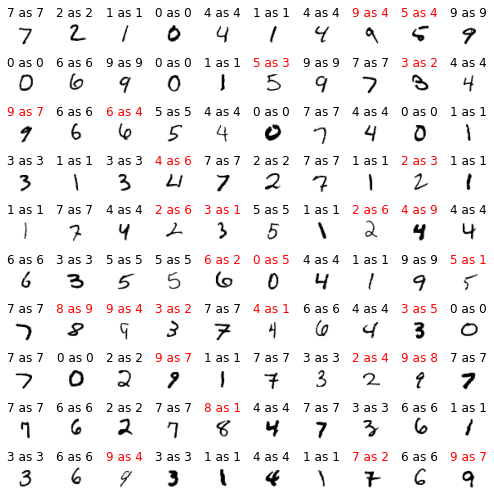

In [132]:
def first_100_tests(nnet, Xtest, Ttest):
    plt.figure(figsize=(7, 7))
    Ytest, _ = nnet.use(Xtest[:100, :])
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        draw_digit(Xtest[i], Ttest[i, 0], Ytest[i, 0])
    plt.tight_layout()

first_100_tests(nnet, Xtest, Ttest)

## Requirement 2



Experiment with the three different optimization methods, at least three hidden layer structures including `[]`, two learning rates, and two numbers of epochs.  Use `verbose=False` as an argument to `train()`.  For `scg`, ignore the learning rate loop.  Print a single line for each run showing method, number of epochs, learning rate, hidden layer structure, and percent correct for training, validation, and testing data. Here is an example line:

        sgd   10 0.1 []       77.16 79.22 79.05
        
Or you can use a `pandas.DataFrame` to show your results.
    

In [127]:
epochs = [100, 500]
learning_rates = [0.1, 0.01]

structures = [[],[20],[30,20]]

methods = ['sgd', 'adam', 'scg']

for method in methods:
    for structure in structures:
        for n_epochs in epochs:
            for learning_rate in learning_rates:
                nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], structure, 10)
                nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs=n_epochs, method=method, learning_rate=learning_rate,momentum=0.9,verbose=False)
                print(f"{method}  {n_epochs} {learning_rate} {structure}   {percent_correct(nnet.use(Xtrain)[0], Ttrain)} {percent_correct(nnet.use(Xval)[0], Tval)} {percent_correct(nnet.use(Xtest)[0], Ttest)}")
                if method == 'scg':
                    break

sgd  100 0.1 []   90.254 91.13 90.64
sgd  100 0.01 []   84.244 86.05000000000001 85.35000000000001
sgd  500 0.1 []   91.988 92.25999999999999 91.79
sgd  500 0.01 []   89.16199999999999 90.2 89.62
sgd  100 0.1 [20]   82.04599999999999 83.82 83.12
sgd  100 0.01 [20]   53.61 54.900000000000006 55.35
sgd  500 0.1 [20]   92.58 92.73 92.21000000000001
sgd  500 0.01 [20]   71.682 73.19 72.95
sgd  100 0.1 [30, 20]   65.864 67.01 67.01
sgd  100 0.01 [30, 20]   33.316 33.61 34.589999999999996
sgd  500 0.1 [30, 20]   92.218 92.71000000000001 91.86999999999999
sgd  500 0.01 [30, 20]   44.644 45.65 45.12
adam  100 0.1 []   76.53 78.79 78.12
adam  100 0.01 []   80.868 82.89999999999999 82.33
adam  500 0.1 []   76.53 78.79 78.12
adam  500 0.01 []   80.868 82.89999999999999 82.33
adam  100 0.1 [20]   93.15 90.89 90.16
adam  100 0.01 [20]   94.972 92.75 92.56
adam  500 0.1 [20]   93.45 91.62 90.73
adam  500 0.01 [20]   96.222 92.75999999999999 92.17
adam  100 0.1 [30, 20]   94.754 91.29 90.600000000000

# Requirement 3

Complete the following function.

In [94]:
def make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                          n_hidden_units_each_layer, n_epochs,
                          method, learning_rate=0.1, momentum=0.9):
    
    from IPython.display import display   # to display the confusion matrix in the last step of this function
    
    # Create NeuralNetworkClassifier object
    nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], n_hidden_units_each_layer, 10)
    
    # Train it.
    nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs=n_epochs, method=method, learning_rate=learning_rate, momentum=momentum)
    
    # Plot the performance trace with legend (f'{method} Train Data', f'{method} Validation Data')    
    plt.figure()
    plt.clf()
    plt.plot(nnet.get_performance_trace())
    plt.xlabel('Epoch')
    plt.ylabel('Data Likelihood')
    plt.legend((f'{method} Train Data', f'{method} Validation Data'))

    # Show the results on the first 100 test images.
    first_100_tests(nnet, Xtest,Ttest)
    
    plt.show()

    # Print the network
    print(nnet)
    
    # Print percent correct on training data, validation data and test data.
    print(f"Training {percent_correct(nnet.use(Xtrain)[0], Ttrain)}% correct")
    print(f"Validation {percent_correct(nnet.use(Xval)[0], Tval)}% correct")
    print(f"Testing {percent_correct(nnet.use(Xtest)[0], Ttest)}% correct")

    # Print a confusion matrix using the trained neural network applied to the testing data.
    # display(confusion_matrix( ... )
    display(confusion_matrix(nnet.use(Xtest)[0], Ttest))
    

Here is an example of what your function should produce.


Adam: Epoch 4 Likelihood= Train 0.44110 Validate 0.44430
Adam: Epoch 8 Likelihood= Train 0.56628 Validate 0.57584
Adam: Epoch 12 Likelihood= Train 0.62011 Validate 0.63407
Adam: Epoch 16 Likelihood= Train 0.64555 Validate 0.65785
Adam: Epoch 20 Likelihood= Train 0.66307 Validate 0.67556
Adam: Epoch 24 Likelihood= Train 0.67770 Validate 0.68864
Adam: Epoch 28 Likelihood= Train 0.68994 Validate 0.69938
Adam: Epoch 32 Likelihood= Train 0.70050 Validate 0.70835
Adam: Epoch 36 Likelihood= Train 0.71042 Validate 0.71584
Adam: Epoch 40 Likelihood= Train 0.71814 Validate 0.71987


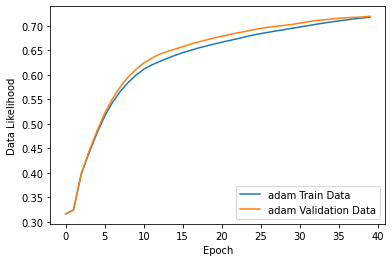

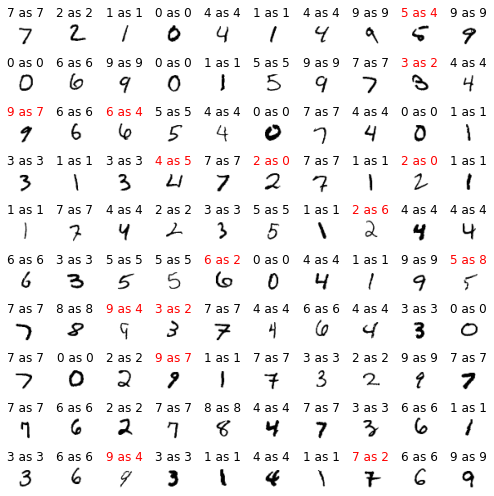

NeuralNetworkClassifier(784, [5], 10) trained for 40 epochs
  with final errors of 0.7181 train 0.7181 validation
  using best weights from epoch 40.
Training 81.8% correct
Validation 82.14% correct
Testing 81.5% correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,90.8,0.0,0.9,1.7,0.2,2.9,1.1,0.2,2.1,0.0
1,0.1,94.4,0.5,0.1,0.8,0.0,0.9,2.8,0.4,0.0
2,7.4,0.1,80.2,2.1,1.6,0.0,2.2,4.0,2.2,0.2
3,2.9,1.0,10.3,73.3,0.2,1.7,1.0,7.2,1.2,1.3
4,0.1,0.5,2.3,0.0,90.1,0.1,1.1,0.6,0.5,4.6
5,8.5,0.7,1.7,6.2,1.9,65.4,3.1,1.5,10.5,0.6
6,1.0,0.5,4.8,0.0,1.9,1.6,90.0,0.1,0.1,0.0
7,0.1,1.6,2.0,1.1,0.7,0.1,0.1,86.7,2.4,5.3
8,5.5,4.4,2.3,0.5,6.7,4.8,0.6,10.3,62.7,2.2
9,0.8,0.2,0.4,0.7,11.9,0.9,0.1,6.0,0.8,78.2


In [167]:
hiddens = [5]
n_epochs = 40
method = 'adam'
learning_rate = 0.1
make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, method, learning_rate)

Use your function to show results with the three different optimization methods using values for the hidden layer structure, learning rate, and numbers of epochs that works well for all three methods.

SGD: Epoch 50 Likelihood= Train 0.35048 Validate 0.35111
SGD: Epoch 100 Likelihood= Train 0.52201 Validate 0.52585
SGD: Epoch 150 Likelihood= Train 0.64783 Validate 0.65396
SGD: Epoch 200 Likelihood= Train 0.73109 Validate 0.73898
SGD: Epoch 250 Likelihood= Train 0.78185 Validate 0.78974
SGD: Epoch 300 Likelihood= Train 0.81246 Validate 0.81955
SGD: Epoch 350 Likelihood= Train 0.83281 Validate 0.83875
SGD: Epoch 400 Likelihood= Train 0.84736 Validate 0.85194
SGD: Epoch 450 Likelihood= Train 0.85843 Validate 0.86157
SGD: Epoch 500 Likelihood= Train 0.86728 Validate 0.86900


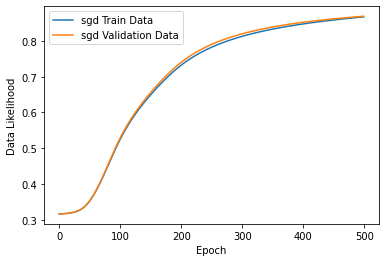

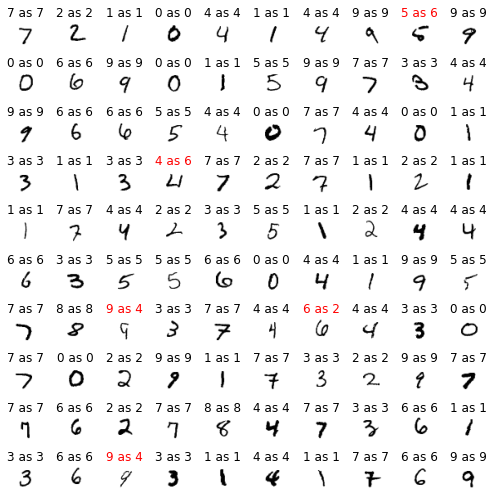

NeuralNetworkClassifier(784, [30, 20], 10) trained for 500 epochs
  with final errors of 0.8673 train 0.8673 validation
  using best weights from epoch 500.
Training 92.538% correct
Validation 92.47% correct
Testing 92.25999999999999% correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,97.7,0.0,0.0,0.1,0.2,0.5,1.1,0.1,0.2,0.1
1,0.0,97.6,0.5,0.1,0.1,0.2,0.3,0.1,1.1,0.1
2,1.3,0.4,91.2,1.1,0.7,0.2,1.4,0.9,2.8,0.2
3,0.2,0.1,2.0,90.7,0.1,3.2,0.2,1.7,1.5,0.4
4,0.1,0.5,0.4,0.0,94.0,0.0,1.2,0.6,0.4,2.7
5,1.2,0.2,0.6,4.1,0.9,87.0,1.6,1.1,2.6,0.7
6,1.5,0.4,0.5,0.1,0.8,1.6,94.7,0.1,0.3,0.0
7,0.5,1.5,1.5,0.8,1.1,0.0,0.0,91.8,0.0,2.9
8,0.5,0.9,0.8,2.2,1.4,3.0,0.8,1.0,88.2,1.1
9,1.1,0.8,0.2,1.3,4.6,0.6,0.0,2.2,0.6,88.7


Adam: Epoch 50 Likelihood= Train 0.90266 Validate 0.86265
Adam: Epoch 100 Likelihood= Train 0.92656 Validate 0.86069
Adam: Epoch 150 Likelihood= Train 0.93653 Validate 0.85259
Adam: Epoch 200 Likelihood= Train 0.94237 Validate 0.84599
Adam: Epoch 250 Likelihood= Train 0.94693 Validate 0.83935
Adam: Epoch 300 Likelihood= Train 0.94868 Validate 0.83111
Adam: Epoch 350 Likelihood= Train 0.95004 Validate 0.82684
Adam: Epoch 400 Likelihood= Train 0.95480 Validate 0.82315
Adam: Epoch 450 Likelihood= Train 0.95558 Validate 0.81690
Adam: Epoch 500 Likelihood= Train 0.94860 Validate 0.82022


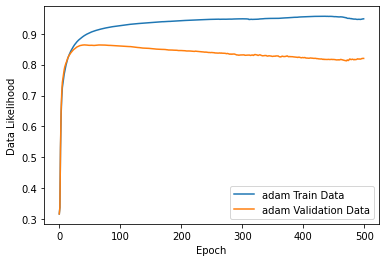

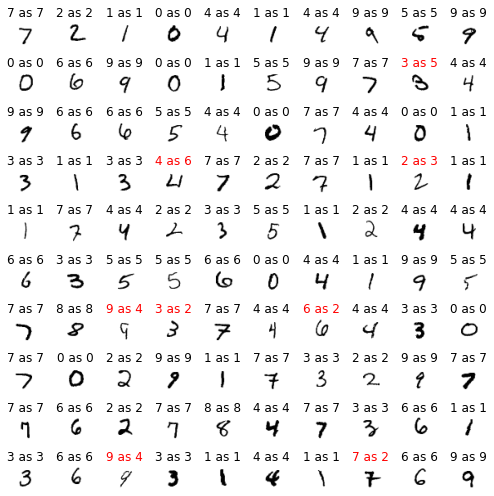

NeuralNetworkClassifier(784, [30, 20], 10) trained for 500 epochs
  with final errors of 0.9486 train 0.9486 validation
  using best weights from epoch 42.
Training 93.746% correct
Validation 91.53999999999999% correct
Testing 91.34% correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,95.9,0.0,0.1,0.5,0.2,1.1,1.4,0.3,0.4,0.0
1,0.0,97.2,0.6,0.3,0.0,0.1,0.4,0.3,1.2,0.0
2,1.6,0.4,89.3,2.4,1.2,0.3,1.6,1.2,1.8,0.2
3,0.1,0.6,3.3,88.7,0.3,3.1,0.0,1.3,2.1,0.6
4,0.3,0.3,0.8,0.0,93.8,0.0,1.1,0.9,0.4,2.3
5,1.2,0.4,0.6,5.0,0.9,85.7,0.9,0.9,3.9,0.4
6,1.4,0.2,0.6,0.0,1.5,1.5,94.3,0.0,0.6,0.0
7,0.1,0.5,1.9,1.0,0.8,0.1,0.1,91.7,0.4,3.4
8,0.6,0.4,1.5,2.7,1.0,3.5,0.8,1.3,86.8,1.3
9,0.9,0.4,0.3,1.7,3.2,1.0,0.0,3.0,0.7,88.9


SCG: Epoch 50 Likelihood= Train 0.95522 Validate 0.91293
SCG: Epoch 100 Likelihood= Train 0.99565 Validate 0.85842
SCG: Epoch 150 Likelihood= Train 0.99892 Validate 0.83151
SCG: Epoch 200 Likelihood= Train 0.99993 Validate 0.76606
SCG: Epoch 250 Likelihood= Train 0.99995 Validate 0.76051
SCG: Epoch 300 Likelihood= Train 0.99998 Validate 0.74484
SCG: Epoch 350 Likelihood= Train 0.99999 Validate 0.72779
SCG: Epoch 400 Likelihood= Train 0.99999 Validate 0.71949
SCG: Epoch 450 Likelihood= Train 1.00000 Validate 0.68391
SCG: Epoch 500 Likelihood= Train 1.00000 Validate 0.66939


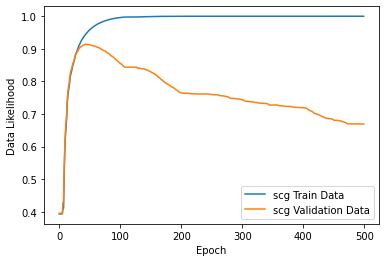

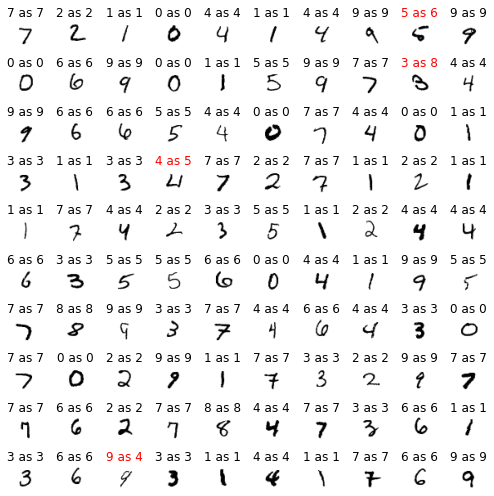

NeuralNetworkClassifier(784, [30, 20], 10) trained for 500 epochs
  with final errors of 1.0000 train 1.0000 validation
  using best weights from epoch 47.
Training 96.884% correct
Validation 95.17999999999999% correct
Testing 94.73% correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,97.8,0.0,0.3,0.0,0.1,0.5,0.7,0.3,0.2,0.1
1,0.0,98.6,0.2,0.3,0.0,0.2,0.1,0.3,0.4,0.0
2,0.7,0.2,92.8,1.4,0.9,0.2,0.4,1.4,1.9,0.2
3,0.3,0.1,1.9,93.3,0.1,1.6,0.1,1.1,1.1,0.5
4,0.0,0.0,0.4,0.1,96.2,0.1,0.9,0.4,0.3,1.5
5,0.8,0.1,0.1,2.9,0.3,91.9,1.2,0.0,1.7,0.9
6,0.7,0.3,0.6,0.1,0.8,0.8,96.0,0.2,0.3,0.0
7,0.1,0.9,1.1,0.8,0.3,0.1,0.0,94.2,0.3,2.3
8,0.7,0.4,0.6,1.2,0.6,1.0,0.5,1.1,93.0,0.7
9,0.7,0.2,0.0,0.9,2.8,0.4,0.1,1.7,0.4,92.9


In [133]:
hiddens = [30,20]
n_epochs = 500
methods = ['sgd', 'adam', 'scg']
learning_rate = 0.1
for method in methods:
    make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, method, learning_rate)

# Requirement 4

Discuss your results.  In your discussion, include observations about 

* which method achieves the best result,
* which method seems to do best with fewer epochs,
* what common classification mistakes are made as shown in your confusion matrices, and
* do larger networks (more layers, more units) work better than small networks?

Discussion:

It can be observed from the experiments ran in requirement 3 that the model performed much better when the learning rate was 0.1 and the hidden layers structure was [30,20]. Similarly, we got better values for percent correct in train, validation and test cases with higher number of epochs i.e. 500 for same structure and learning rate. This shows that the classification model can be further improved with more epochs to a point of noticeable improvements. Thus, for requirement 4, I used these values to train the model with different methods.

Comparing the methods, it can be observed that SGD performed the least among the three. It takes much longer epochs compared to others to reach higher data likelihood and the final results are comparatively lower as well. Between Adam and SCG, SCG gives better validation and test percent correct results. But looking at the plot, it seems like SCG overfits to training data sooner than Adam. To conclude, SCG provides the best results among all the methods used to train the model. 

Additionally, looking at the plots, it can be observed that the test results reach a highest point sooner for SCG. Thus, it seems to do better with fewer epochs compared to others, with SGD taking the more epochs to reach a high point. 

By observing confusion matrices for all three methods, it can be noticed that the models mostly misclassify 3,4,5,8 and 9. Instances with higher values misclassify 4 as 9, 8 as 3, 5 as 3 or 8 as 5. It makes since these digits are sort of similar structurally. 

Looking at the results from requirement 2, it can be inferred that the model with higher number of units and more layers performed better with higher percent correct values. This might mean that more units can better represent the 784 pixel values with appropriate weights and more layers provide better approximations and thus giving better results. But it may not always be the case, as at some point adding more units and layers doesn't necessarily provide improvements and may lead to overfitting of training data.

# Requirement 5

Train a network with values for method, learning rate, number of epochs, and a 
hidden layer structure with no more than 100 units in the first layer that you found work well.  Extract the
weight matrix from the first layer.  Now, for each unit (column in the weight matrix) ignore the first row of bias weights and
reshape the remaining weights into a 28 x 28 image for each unit and display them. Complete the following function to draw the weight matrix for one unit using `draw_digit` as a guide, then use it in a loop to draw the weight matrices for each unit in the first layer of your network.

Discuss what you see.  Describe some of the images as patterns that could be useful for classifying particular digits.

In [139]:
hiddens = [100,20]
n_epochs = 500
learning_rate = 0.1
method = 'scg'
# Create NeuralNetworkClassifier object
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], hiddens, 10)

# Train it.
nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs=n_epochs, method=method, learning_rate=learning_rate)
print(nnet)

SCG: Epoch 50 Likelihood= Train 0.98111 Validate 0.91831
SCG: Epoch 100 Likelihood= Train 0.99996 Validate 0.87429
SCG: Epoch 150 Likelihood= Train 0.99997 Validate 0.87193
SCG: Epoch 200 Likelihood= Train 0.99997 Validate 0.87193
SCG: Epoch 250 Likelihood= Train 0.99997 Validate 0.87193
SCG: Epoch 300 Likelihood= Train 0.99997 Validate 0.87193
SCG: Epoch 350 Likelihood= Train 0.99997 Validate 0.87193
SCG: Epoch 400 Likelihood= Train 0.99997 Validate 0.87193
SCG: Epoch 450 Likelihood= Train 0.99997 Validate 0.87193
SCG: Epoch 500 Likelihood= Train 0.99997 Validate 0.87193
NeuralNetworkClassifier(784, [100, 20], 10) trained for 500 epochs
  with final errors of 1.0000 train 1.0000 validation
  using best weights from epoch 40.


In [140]:
print(f"Training {percent_correct(nnet.use(Xtrain)[0], Ttrain)}% correct")
print(f"Validation {percent_correct(nnet.use(Xval)[0], Tval)}% correct")
print(f"Testing {percent_correct(nnet.use(Xtest)[0], Ttest)}% correct")

Training 97.482% correct
Validation 95.65% correct
Testing 95.43% correct


In [141]:
def draw_weight_matrix(W, unit_index = 0):
    """W is matrix of weights, with shape 784 x n_units in first layer of neural network"""
    unit_samples = W[:, unit_index]
    image = -unit_samples.reshape(28,28)
    plt.imshow(image, cmap='gray')

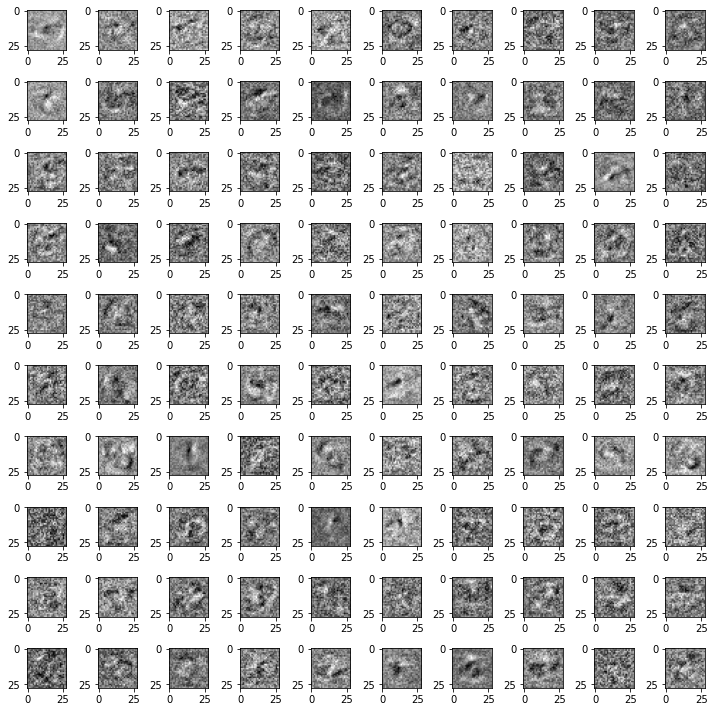

In [142]:
W = nnet.Ws[0]
n_units = W.shape[1]
n_plot_rows = round(np.sqrt(n_units) + 0.5)
n_plot_cols = n_plot_rows

plt.figure(figsize=(10, 10))
for i in range(n_units):
    plt.subplot(n_plot_rows, n_plot_cols, i+1)
    draw_weight_matrix(W[1:],i)
plt.tight_layout()

Discussion:

From the grid of images, we can observe silhouettes of the digits with grainy patterns that form structures of a digit. For examples in the 7th image of rightmost column, we can see a pattern of what seems to be a 6 digit. It can be inferred that the neural network learns this pattern of black and white colours to distinguish various digits and optimize from its mistakes while validating against the labelled data.

## Check-In

Tar or zip your jupyter notebook (`A4solution.ipynb`) and your python script file (`neuralnetworksA4.py`) into a file named `A4.tar` or `A4.zip`.  You do not need to include `optimizers3.py` in your tar or zip file. Check in the tar or zip file in Canvas.

# Grading

Download [A4grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4grader.tar), extract `A4grader.py` before running the following cell.

Remember, you are expected to design and run your own tests in addition to the tests provided in `A4grader.py`.

In [143]:
%run -i A4grader.py


======================= Code Execution =======================


 import neuralnetworksA4 as nn 
neuralnetworksA4.py defines NeuralNetwork and NeuralNetworkClassifier

## Testing inheritance ####################################################################

    correct = issubclass(nn.NeuralNetworkClassifier, nn.NeuralNetwork)


--- 10/10 points. NeuralNetworkClassifier correctly extends NeuralNetwork.

## Testing inheritance ####################################################################

    # Checking if the _forward function in NeuralNetworkClassifier is inherited from NeuralNetwork

    import inspect
    forward_func = [f for f in inspect.classify_class_attrs(nn.NeuralNetworkClassifier) if (f.name == 'forward' or f.name == '_forward')]
    correct = forward_func[0].defining_class == nn.NeuralNetwork


--- 5/5 points. NeuralNetworkClassifier _forward function correctly inherited from NeuralNetwork.

## Testing inheritance ##################################################

# Extra Credit

Repeat the above experiments with a different classification data set.  Randonly partition your data into training, validaton and test parts if not already provided.  Write in markdown cells descriptions of the data and your results.

Explain Fashion MNIST dataset

In [31]:
fashion_train= pandas.read_csv('fashion_mnist/fashion-mnist_train.csv')
fashion_test = pandas.read_csv('fashion_mnist/fashion-mnist_test.csv')

In [32]:
fashion_train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [33]:
fashion_test.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [82]:
T=fashion_train['label'].to_numpy().reshape(-1,1)
Ttest=fashion_test['label'].to_numpy().reshape(-1,1)
T.shape, Ttest.shape

((60000, 1), (10000, 1))

In [83]:
X = fashion_train.loc[:, fashion_train.columns != 'label'].to_numpy()
Xtest = fashion_test.loc[:, fashion_train.columns != 'label'].to_numpy()
X.shape, Xtest.shape

((60000, 784), (10000, 784))

In [93]:
class_names = np.unique(T)
class_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [104]:
LABELS = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Boot'
]

In [102]:
def draw_fashion(image, label, predicted_label=None):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    title = str(LABELS[label])
    color = 'black'
    if predicted_label is not None:
        title += ' as {}'.format(LABELS[predicted_label])
        if predicted_label != label:
            color = 'red'
    plt.title(title, color=color)

In [89]:
# partitioning for Xval and Tval
n_samples = X.shape[0]
rows = np.arange(n_samples)
np.random.shuffle(rows)
n_train = round(n_samples * 0.83)

Xtrain = X[rows[:n_train], :]
Ttrain = T[rows[:n_train], :]

Xval = X[rows[n_train:], :]
Tval = T[rows[n_train:], :]

Xtrain.shape, Ttrain.shape, Xval.shape, Tval.shape

((49800, 784), (49800, 1), (10200, 784), (10200, 1))

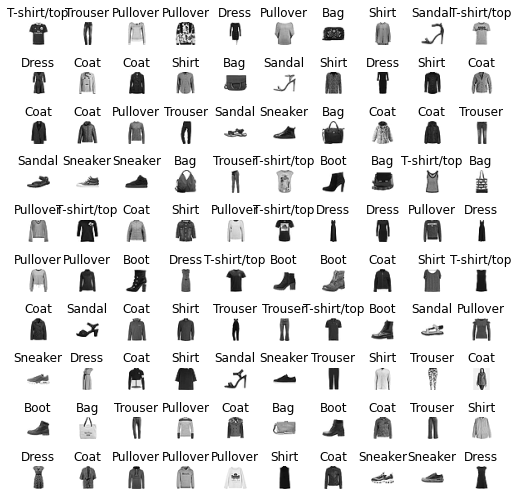

In [118]:
plt.figure(figsize=(7, 7))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_fashion(Xtrain[i], Ttrain[i, 0])
plt.tight_layout()

In [120]:
def fashion_100_tests(nnet, Xtest, Ttest):
    plt.figure(figsize=(10, 10))
    Ytest, _ = nnet.use(Xtest[:100, :])
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        draw_fashion(Xtest[i], Ttest[i, 0], Ytest[i, 0])
    plt.tight_layout()

def make_fashion_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                          n_hidden_units_each_layer, n_epochs,
                          method, learning_rate=0.1, momentum=0.9):
    
    from IPython.display import display   # to display the confusion matrix in the last step of this function
    
    # Create NeuralNetworkClassifier object
    nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], n_hidden_units_each_layer, 10)
    
    # Train it.
    nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs=n_epochs, method=method, learning_rate=learning_rate, momentum=momentum)
    
    # Plot the performance trace with legend (f'{method} Train Data', f'{method} Validation Data')    
    plt.figure()
    plt.clf()
    plt.plot(nnet.get_performance_trace())
    plt.xlabel('Epoch')
    plt.ylabel('Data Likelihood')
    plt.legend((f'{method} Train Data', f'{method} Validation Data'))

    # Show the results on the first 100 test images.
    fashion_100_tests(nnet, Xtest,Ttest)
    
    plt.show()

    # Print the network
    print(nnet)
    
    # Print percent correct on training data, validation data and test data.
    print(f"Training {percent_correct(nnet.use(Xtrain)[0], Ttrain)}% correct")
    print(f"Validation {percent_correct(nnet.use(Xval)[0], Tval)}% correct")
    print(f"Testing {percent_correct(nnet.use(Xtest)[0], Ttest)}% correct")

    # Print a confusion matrix using the trained neural network applied to the testing data.
    # display(confusion_matrix( ... )
    display(confusion_matrix(nnet.use(Xtest)[0], Ttest))
    

SGD: Epoch 5 Likelihood= Train 0.31671 Validate 0.31671
SGD: Epoch 10 Likelihood= Train 0.31816 Validate 0.31814
SGD: Epoch 15 Likelihood= Train 0.32062 Validate 0.32057
SGD: Epoch 20 Likelihood= Train 0.32487 Validate 0.32479
SGD: Epoch 25 Likelihood= Train 0.33203 Validate 0.33190
SGD: Epoch 30 Likelihood= Train 0.34283 Validate 0.34262
SGD: Epoch 35 Likelihood= Train 0.35724 Validate 0.35693
SGD: Epoch 40 Likelihood= Train 0.37473 Validate 0.37430
SGD: Epoch 45 Likelihood= Train 0.39438 Validate 0.39380
SGD: Epoch 50 Likelihood= Train 0.41504 Validate 0.41433


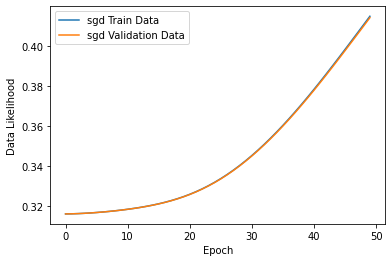

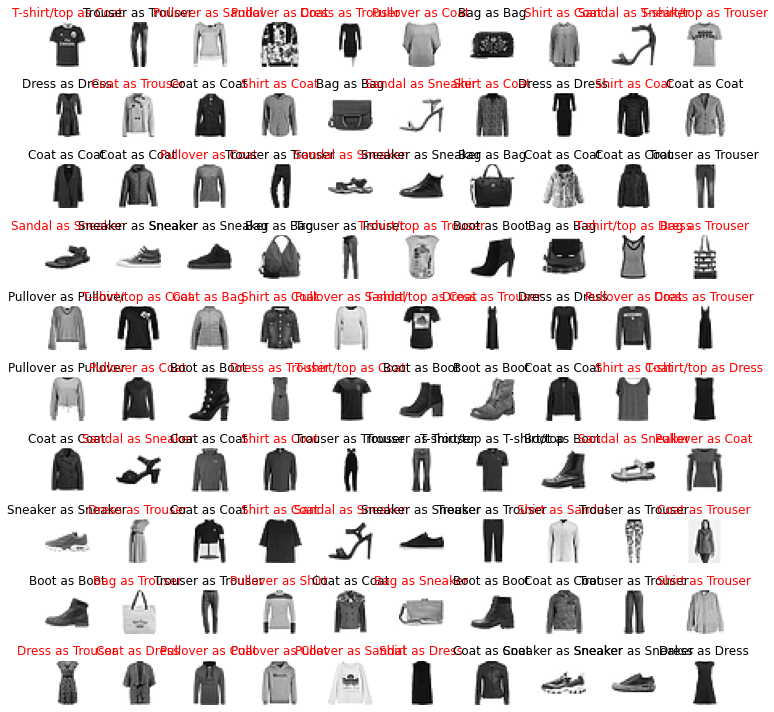

NeuralNetworkClassifier(784, [30, 20], 10) trained for 50 epochs
  with final errors of 0.4150 train 0.4150 validation
  using best weights from epoch 50.
Training 46.37951807228916% correct
Validation 45.86274509803921% correct
Testing 45.81% correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,5.7,23.1,0.2,30.3,36.9,1.3,0.0,0.5,2.0,0.0
1,0.0,95.3,0.6,1.9,2.1,0.1,0.0,0.0,0.0,0.0
2,0.1,8.0,7.8,1.8,72.1,5.6,0.6,0.1,2.9,1.0
3,0.2,55.4,0.1,39.8,4.0,0.3,0.0,0.1,0.1,0.0
4,0.1,8.4,3.3,11.1,73.0,2.1,0.2,0.0,1.6,0.2
5,0.0,0.2,0.0,0.3,0.1,11.9,0.0,83.8,0.0,3.7
6,1.3,18.8,3.6,15.0,47.7,7.9,0.3,1.0,3.4,1.0
7,0.0,0.0,0.0,0.0,0.0,0.3,0.0,96.5,0.0,3.2
8,0.0,3.3,0.2,3.5,3.0,2.8,0.0,8.9,60.3,18.0
9,0.0,0.1,0.0,0.0,1.0,0.3,0.0,30.6,0.5,67.5


Adam: Epoch 5 Likelihood= Train 0.49948 Validate 0.49758
Adam: Epoch 10 Likelihood= Train 0.59319 Validate 0.59091
Adam: Epoch 15 Likelihood= Train 0.64563 Validate 0.64201
Adam: Epoch 20 Likelihood= Train 0.66760 Validate 0.66295
Adam: Epoch 25 Likelihood= Train 0.68941 Validate 0.68340
Adam: Epoch 30 Likelihood= Train 0.70539 Validate 0.69917
Adam: Epoch 35 Likelihood= Train 0.71830 Validate 0.70938
Adam: Epoch 40 Likelihood= Train 0.72939 Validate 0.71860
Adam: Epoch 45 Likelihood= Train 0.73749 Validate 0.72577
Adam: Epoch 50 Likelihood= Train 0.74418 Validate 0.73137


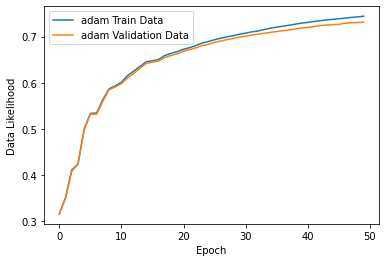

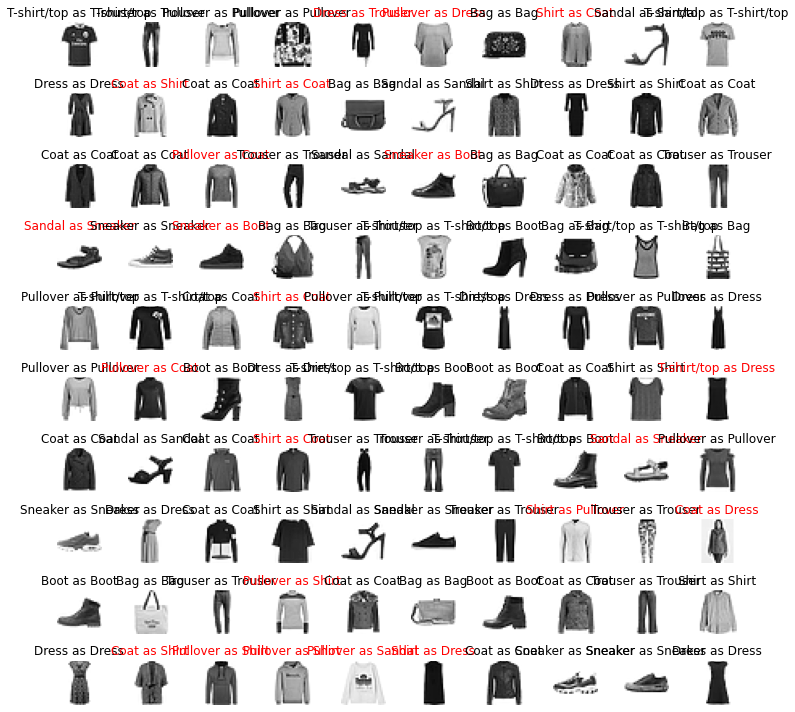

NeuralNetworkClassifier(784, [30, 20], 10) trained for 50 epochs
  with final errors of 0.7442 train 0.7442 validation
  using best weights from epoch 50.
Training 79.17670682730925% correct
Validation 78.54901960784314% correct
Testing 78.66% correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,77.7,0.4,1.7,10.3,1.1,0.3,6.9,0.0,1.4,0.2
1,0.6,93.5,1.0,2.8,1.2,0.0,0.9,0.0,0.0,0.0
2,1.8,0.1,58.9,0.6,21.7,0.1,14.7,0.0,2.1,0.0
3,4.0,1.8,0.7,85.6,4.4,0.0,3.2,0.0,0.3,0.0
4,0.1,0.5,6.4,3.6,79.2,0.2,9.4,0.0,0.5,0.1
5,0.2,0.0,0.1,0.3,0.0,87.0,0.2,6.8,1.1,4.3
6,19.0,0.1,15.8,7.0,21.7,0.3,33.3,0.0,2.6,0.2
7,0.0,0.0,0.0,0.0,0.0,4.9,0.0,84.5,0.1,10.5
8,0.8,0.0,0.6,0.4,0.7,0.6,1.1,0.5,94.9,0.4
9,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,92.0


SCG: Epoch 5 Likelihood= Train 0.61936 Validate 0.61424
SCG: Epoch 10 Likelihood= Train 0.68905 Validate 0.68549
SCG: Epoch 15 Likelihood= Train 0.75082 Validate 0.74707
SCG: Epoch 20 Likelihood= Train 0.78642 Validate 0.78157
SCG: Epoch 25 Likelihood= Train 0.80729 Validate 0.79925
SCG: Epoch 30 Likelihood= Train 0.82244 Validate 0.80953
SCG: Epoch 35 Likelihood= Train 0.83288 Validate 0.81421
SCG: Epoch 40 Likelihood= Train 0.84385 Validate 0.81903
SCG: Epoch 45 Likelihood= Train 0.85221 Validate 0.82221
SCG: Epoch 50 Likelihood= Train 0.86020 Validate 0.82630


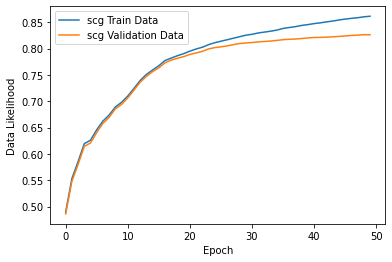

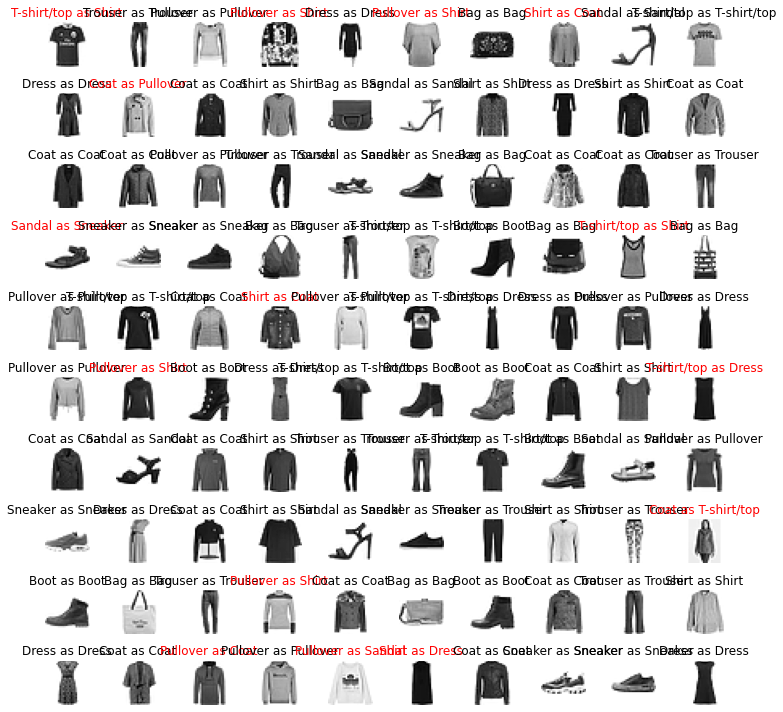

NeuralNetworkClassifier(784, [30, 20], 10) trained for 50 epochs
  with final errors of 0.8613 train 0.8613 validation
  using best weights from epoch 51.
Training 89.25100401606426% correct
Validation 86.50980392156863% correct
Testing 86.75% correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,82.0,0.2,1.4,2.6,0.1,0.0,12.7,0.0,1.0,0.0
1,0.2,97.5,0.2,1.4,0.3,0.2,0.2,0.0,0.0,0.0
2,1.3,0.2,77.1,1.5,10.5,0.1,8.4,0.0,0.9,0.0
3,2.8,1.7,1.1,89.0,3.3,0.2,1.7,0.0,0.2,0.0
4,0.1,0.3,6.9,2.8,82.7,0.1,6.9,0.0,0.2,0.0
5,0.2,0.0,0.0,0.1,0.0,92.4,0.0,4.6,0.7,2.0
6,14.2,0.2,7.2,3.3,9.1,0.0,64.3,0.1,1.6,0.0
7,0.0,0.0,0.0,0.0,0.0,2.6,0.0,92.1,0.1,5.2
8,0.3,0.0,0.9,0.4,0.4,0.6,1.6,0.4,95.3,0.1
9,0.1,0.0,0.0,0.0,0.0,1.6,0.0,3.2,0.0,95.1


In [122]:
hiddens = [30,20]
n_epochs = 50
methods = ['sgd','adam','scg']
learning_rate = 0.1
for method in methods:
    make_fashion_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, method, learning_rate)

SCG: Epoch 5 Likelihood= Train 0.63361 Validate 0.62816
SCG: Epoch 10 Likelihood= Train 0.71329 Validate 0.70584
SCG: Epoch 15 Likelihood= Train 0.75784 Validate 0.75103
SCG: Epoch 20 Likelihood= Train 0.78638 Validate 0.77761
SCG: Epoch 25 Likelihood= Train 0.80319 Validate 0.79406
SCG: Epoch 30 Likelihood= Train 0.81849 Validate 0.80842
SCG: Epoch 35 Likelihood= Train 0.83014 Validate 0.81672
SCG: Epoch 40 Likelihood= Train 0.83881 Validate 0.82138
SCG: Epoch 45 Likelihood= Train 0.84680 Validate 0.82528
SCG: Epoch 50 Likelihood= Train 0.85431 Validate 0.82930


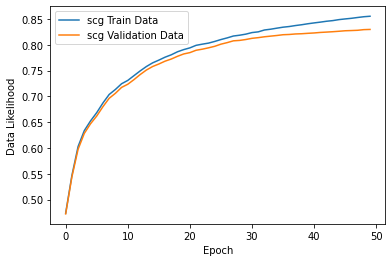

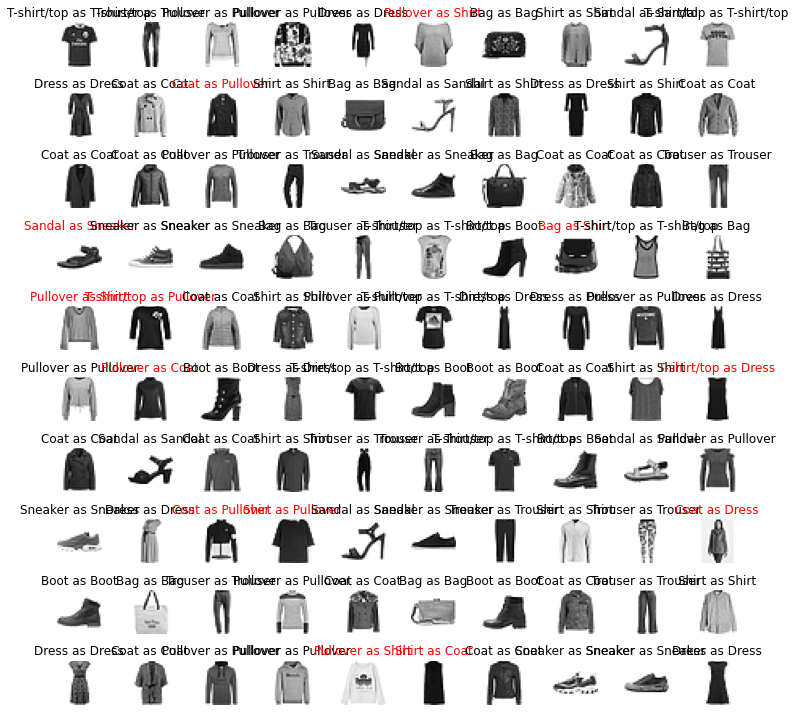

NeuralNetworkClassifier(784, [30, 20], 10) trained for 50 epochs
  with final errors of 0.8553 train 0.8553 validation
  using best weights from epoch 52.
Training 88.79718875502009% correct
Validation 86.65686274509804% correct
Testing 86.88% correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,82.4,0.1,1.6,3.8,0.1,0.2,10.6,0.0,1.0,0.2
1,0.4,97.5,0.6,1.3,0.0,0.1,0.1,0.0,0.0,0.0
2,1.5,0.2,78.7,1.2,10.2,0.0,7.8,0.0,0.4,0.0
3,2.6,1.5,1.0,89.7,2.9,0.1,1.8,0.1,0.2,0.1
4,0.1,0.1,8.1,3.2,82.0,0.0,6.0,0.0,0.5,0.0
5,0.2,0.0,0.0,0.0,0.0,92.3,0.2,4.8,0.8,1.7
6,14.4,0.2,8.3,3.7,7.9,0.2,63.7,0.0,1.5,0.1
7,0.0,0.0,0.0,0.0,0.0,2.7,0.0,93.2,0.0,4.1
8,0.4,0.0,0.6,0.2,0.3,0.6,1.6,0.2,95.7,0.4
9,0.0,0.1,0.0,0.0,0.0,1.7,0.0,4.6,0.0,93.6


In [121]:
hiddens = [30,20]
n_epochs = 50
method = 'scg'
learning_rate = 0.1
make_fashion_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, method, learning_rate)

Fashion MNIST is another dataset similar to MNIST that seems to be quite popular to test with neural networks. I found out about this in an article by Jason Brownlee who mentions this is a more challenging dataset than MNIST.[https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/]

It is a collection of labelled data for gray images of different types of clothes such as tshirts, boots and sneakers. It contains 784 columns for pixel data and can be reshaped into 28x28 images just like MNIST. I reused the functions for MNIST for this dataset with slight modifications to get some results. I trained a model with [30,20] structure for 50 epochs using 0.1 learning rate and obtained decent results. As seen above, I got 86.88% correct results for testing data which can be further improved with more analysis into different kinds of network strucutres and higher epochs to train the model. 